# HuggingFace Transformer

## Transformer(트랜스포머)

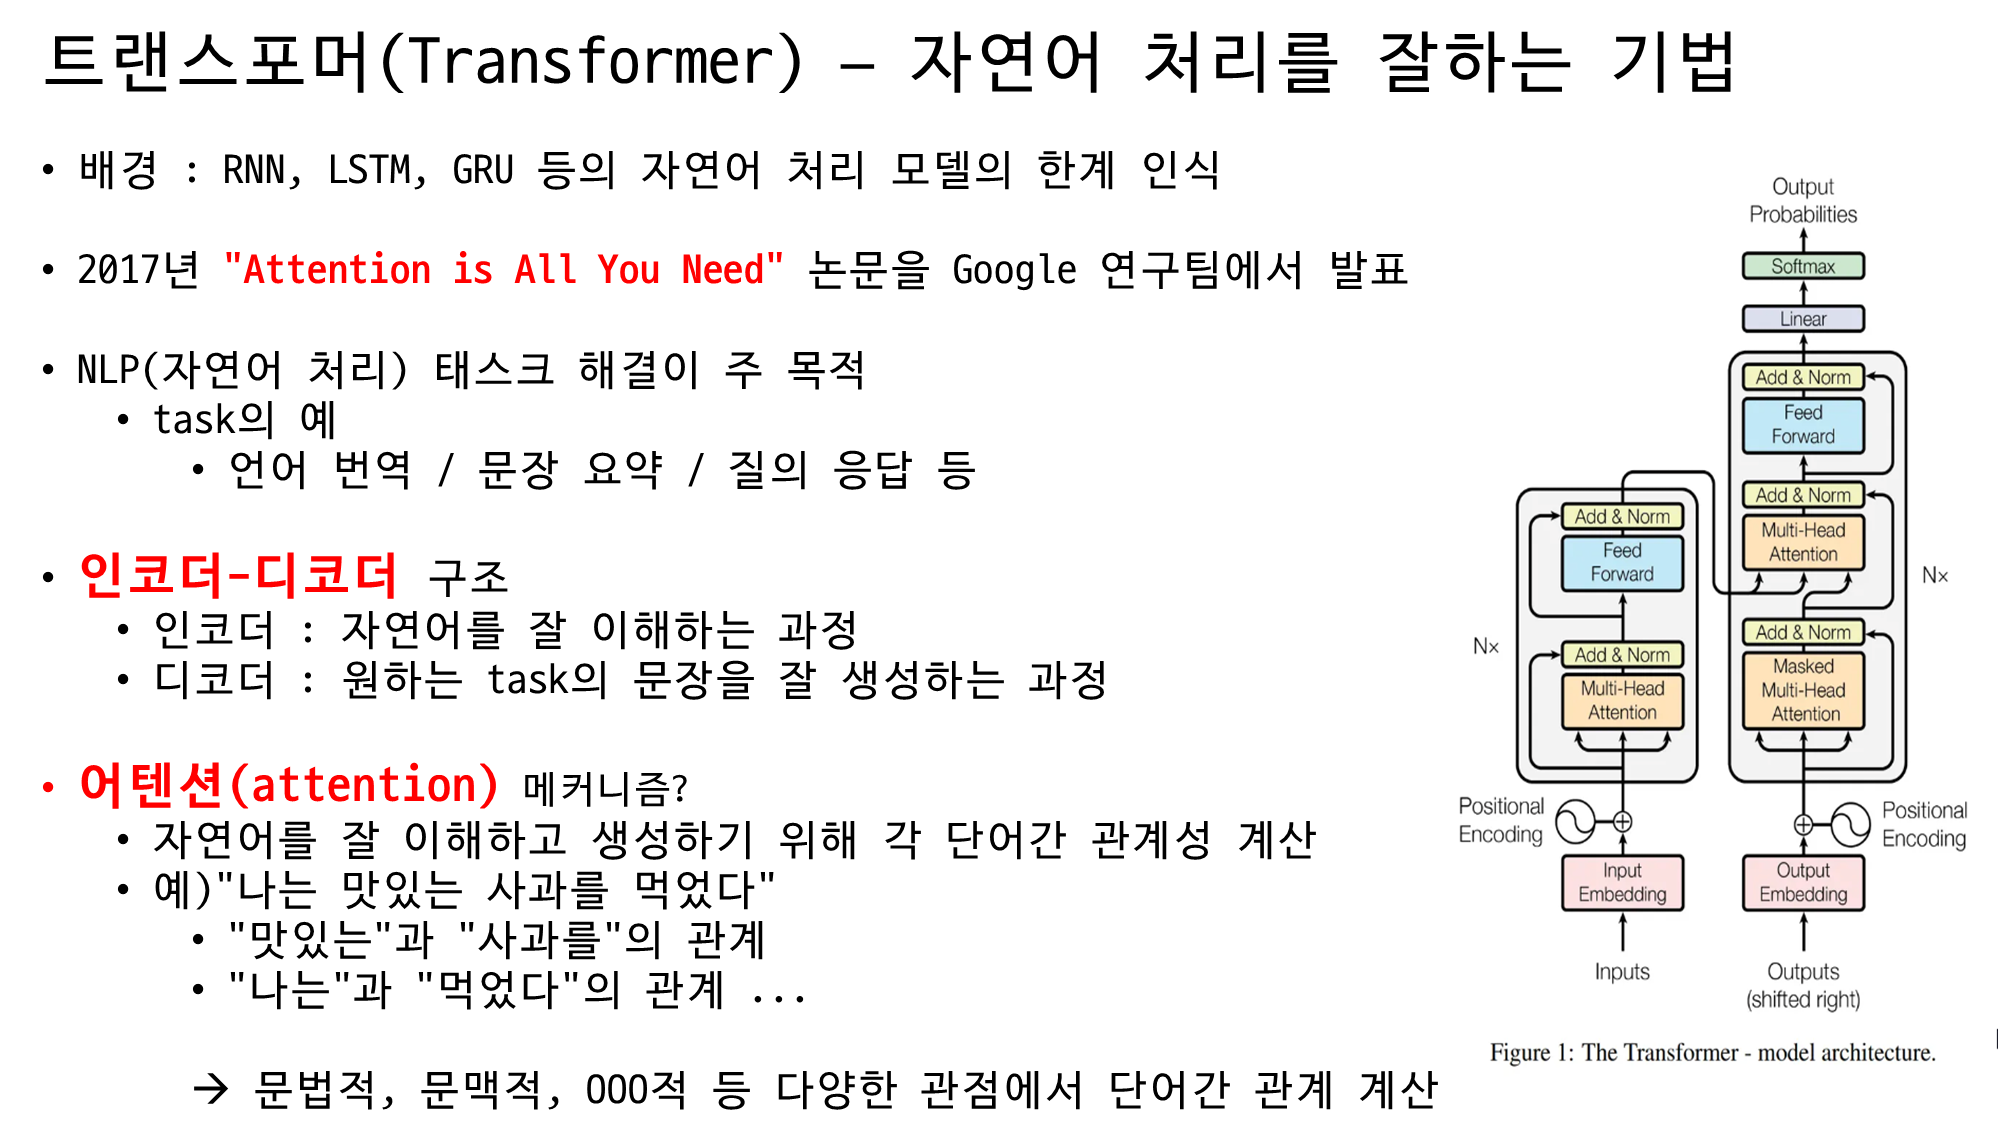

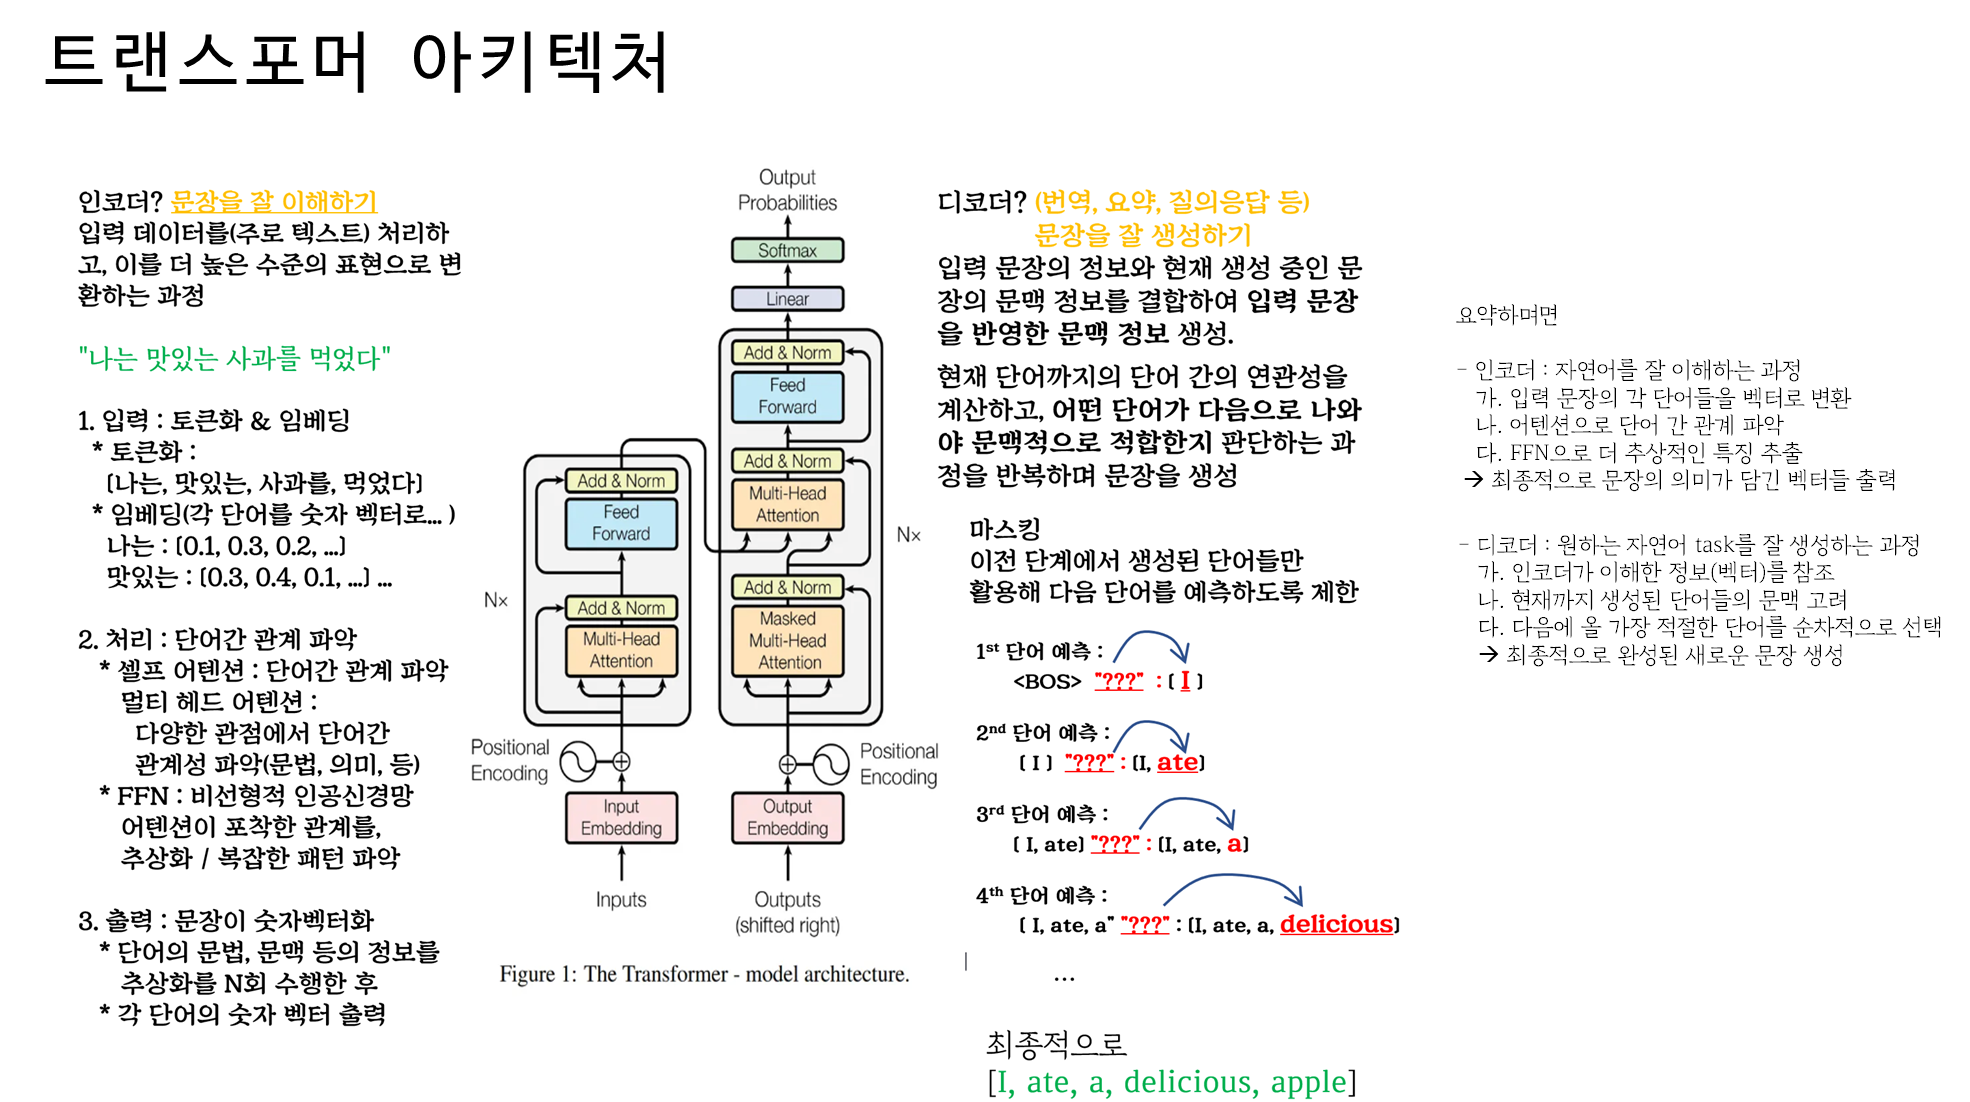

## Hugging Face(엄청난 양의 인공지능 모델을 모아놓은 곳, 노다지)

https://huggingface.co/models

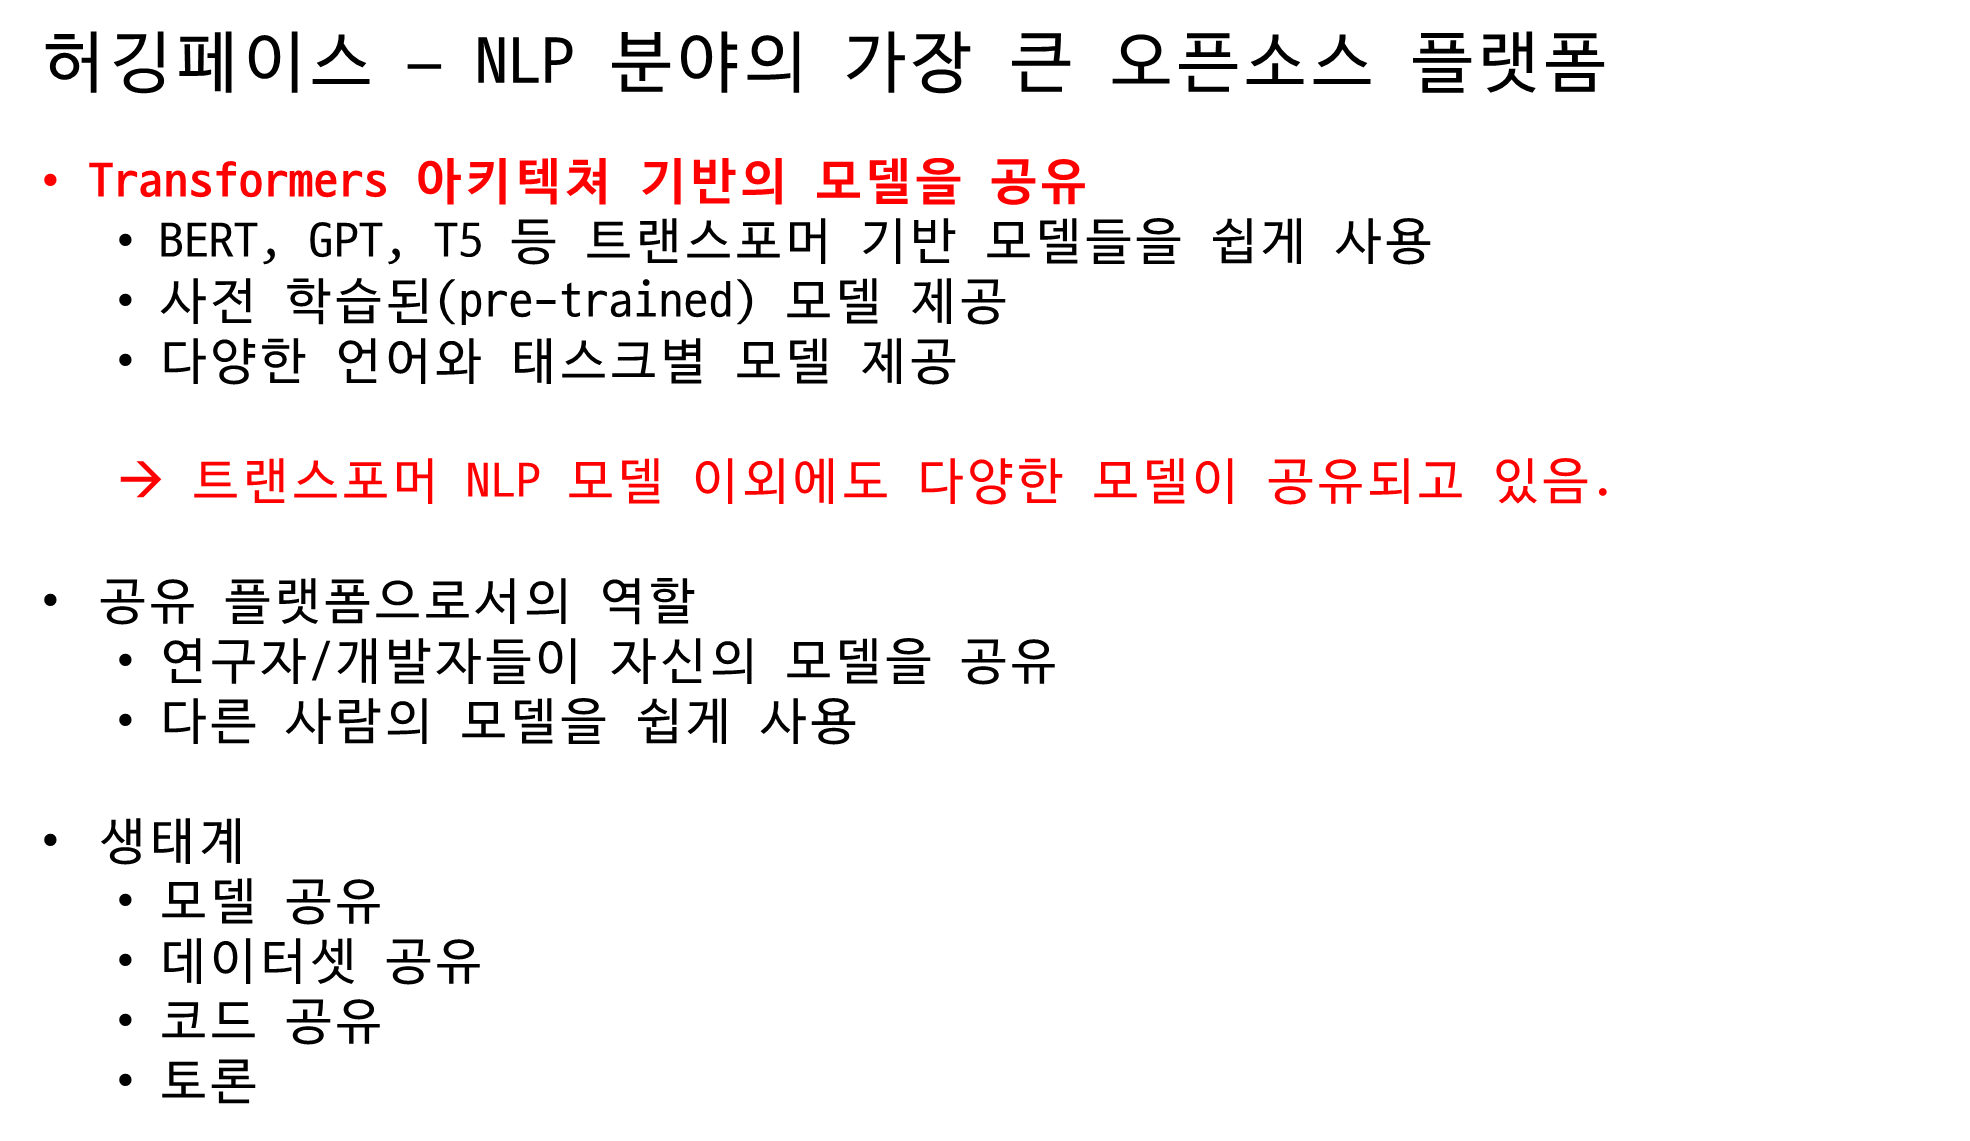

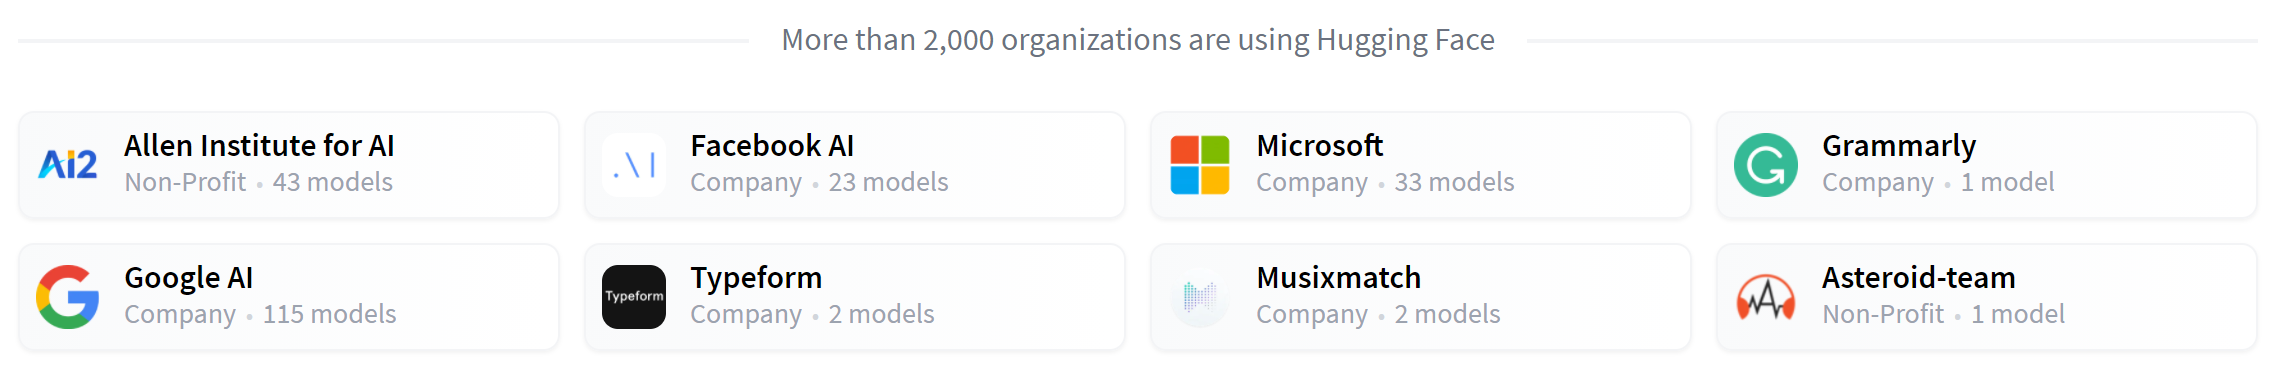

🤗 Transformers 라이브러리는 개발되어 공유된 모델을 사용하고 새롭게 구축하는 기능들을 제공.  
🤗 Model Hub에서는 모두가 다운로드 받아 쓸 수 있는 수 천 개의 사전 학습된 모델들이 있음.  
🤗 자신만의 모델을 Hub에 업로드하는 것 또한 가능

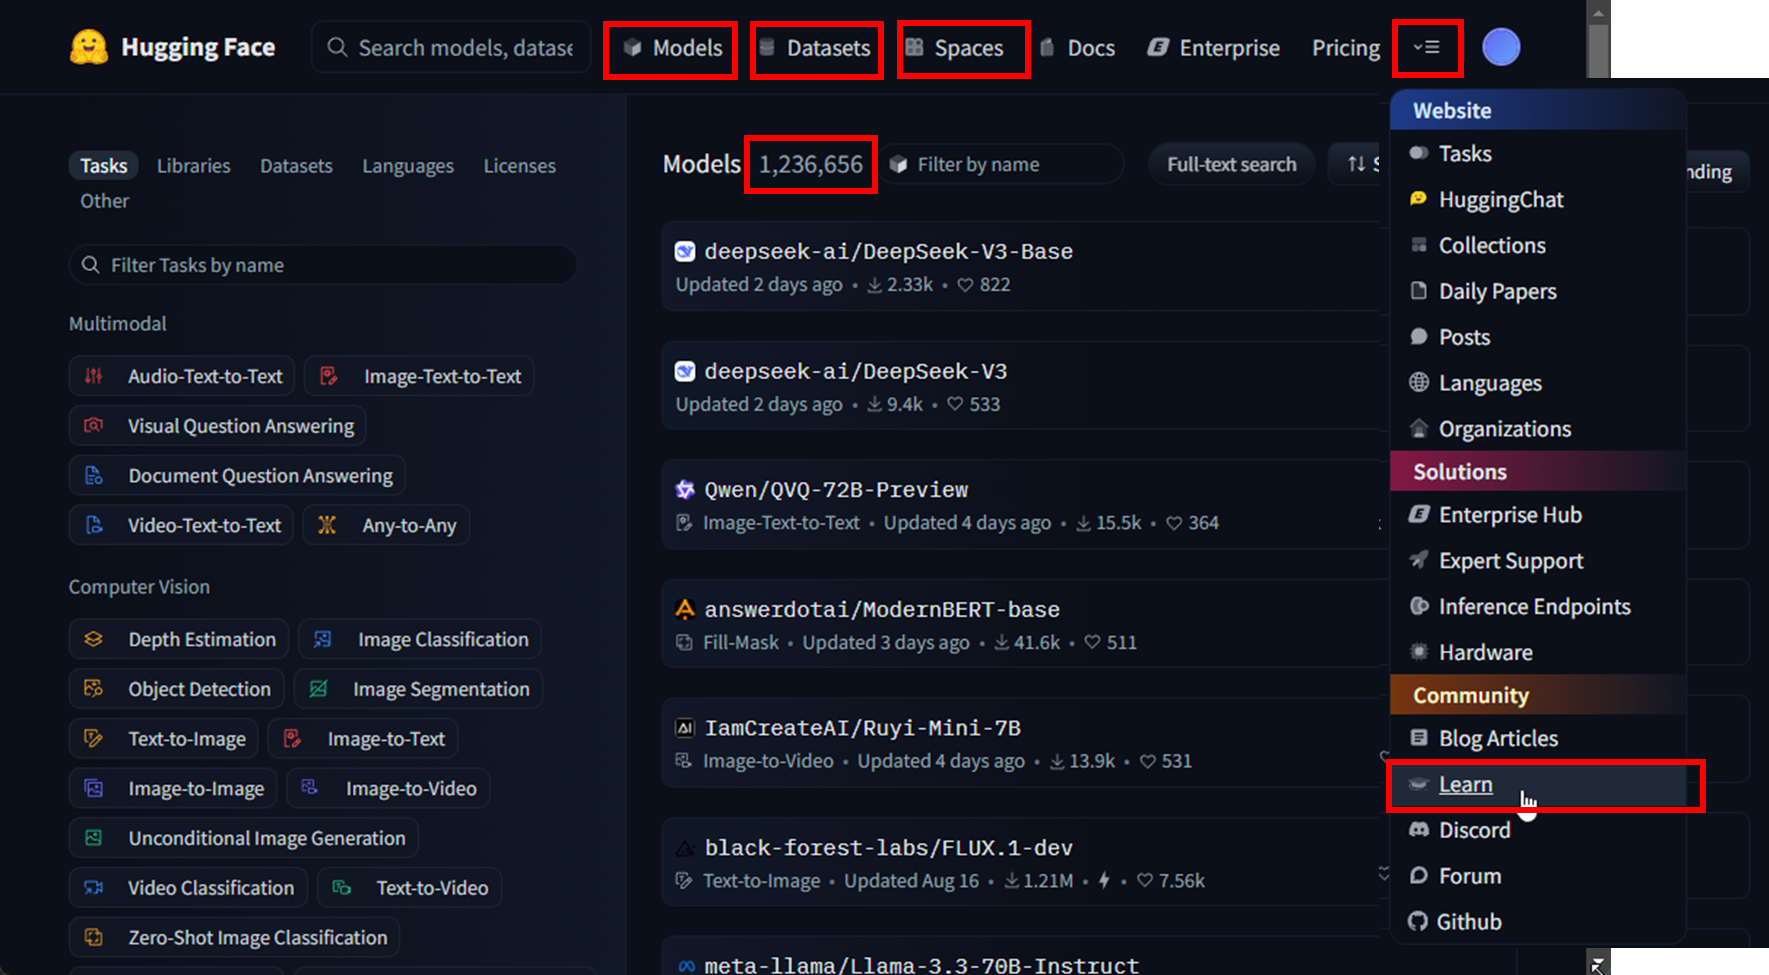

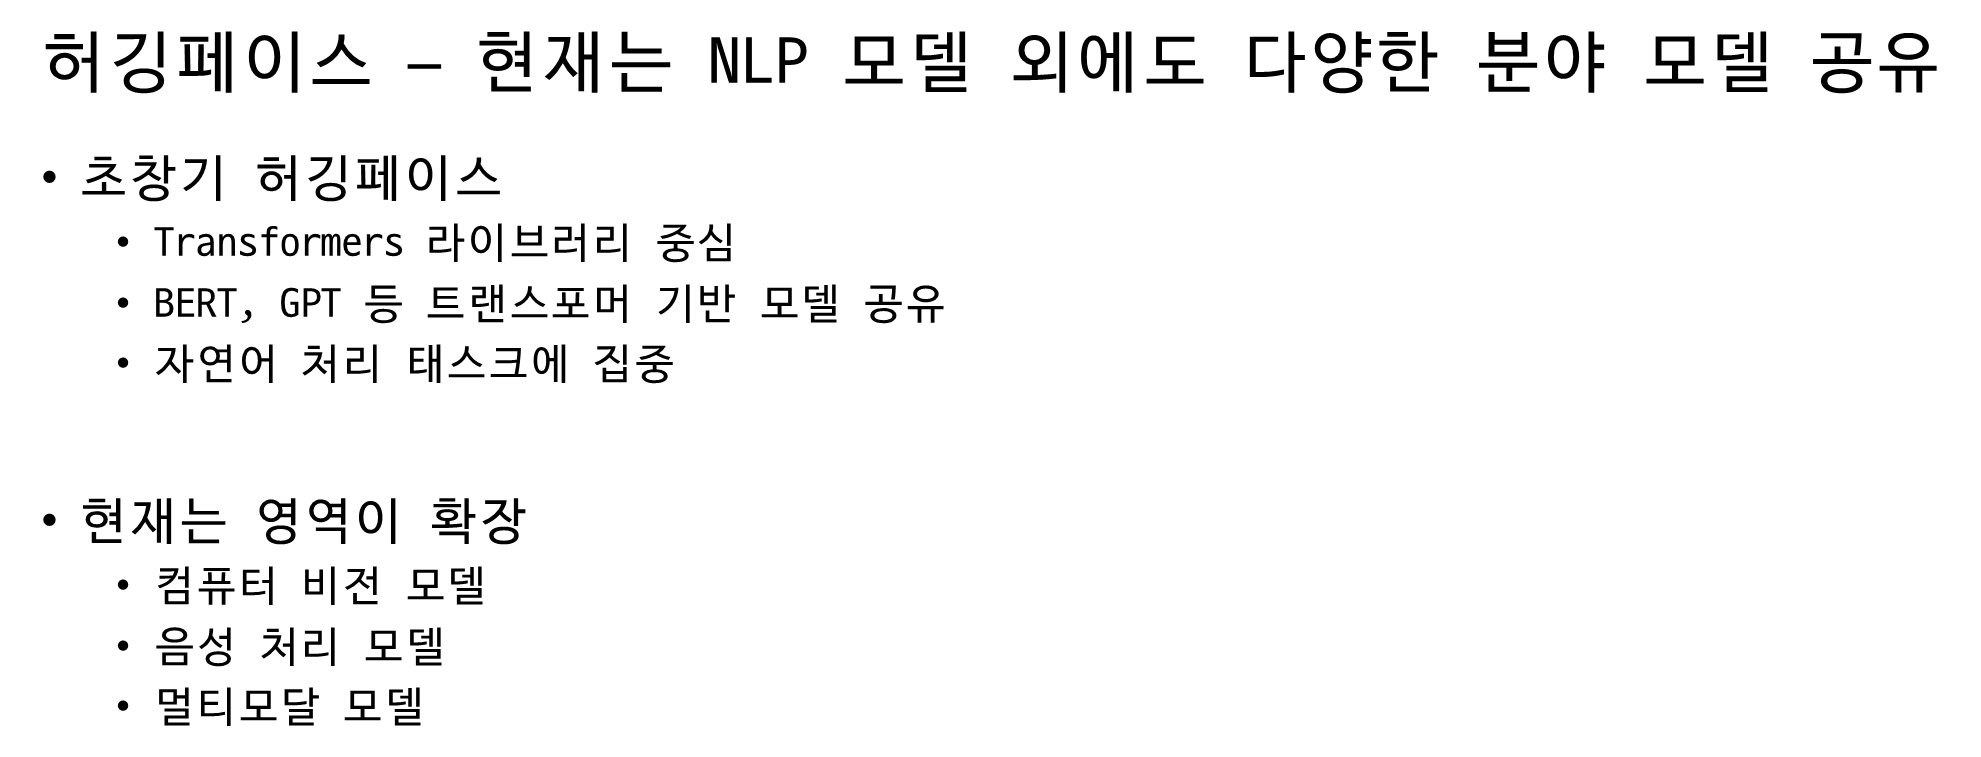

## Python

In [ ]:
# shift + enter를 눌러서 실행시켜 보기
print("Hello World")

In [ ]:
a = input("이름?")

print(a, "님 안녕하세요")

In [ ]:
print(2 ** 3)

In [ ]:
a = 5

if a%2==0 :
    print("짝수")
else :
    print("홀수")

In [ ]:
for i in range(1, 6) :
    print(i)

In [ ]:
L = [1, 2, 3, "1반", "2반", "3반", "4반"]

for i in L :
    print(i)

1
2
3
1반
2반
3반
4반


In [ ]:
a = 5
b = 3

In [ ]:
# 모든 셀은 이전 셀 코드의 연장에 있다고 봄.

print(a + b)

In [ ]:
# 마지막 변수, 표현식, 함수 등의 값은 print()없이도 자동 출력됨
a
b

In [ ]:
# 함수정의
def max(a, b) :




result = max(3, 5)

In [ ]:
# 함수정의
def add(a, b) :   # a부터 b까지의 합을 리턴



result = add(3, 5)

## 파이썬의 컨테이너 자료구조

In [ ]:
L = [1, 2, 3, 4, 5]
T = (1, 2, 3, 4, 5)
D = {1:"H", 2:"He", 3:"Li"}

C = [L, T, D, {'H':1, 'He':2}]  # [[1, 2, 3, 4, 5], (1, 2, 3, 4, 5), {1: 'H', 2: 'He', 3: 'Li'}, {'H': 1, 'He': 2}]

In [ ]:
L

[1, 2, 3, 4, 5]

In [ ]:
T

(1, 2, 3, 4, 5)

In [ ]:
D

{1: 'H', 2: 'He', 3: 'Li'}

In [ ]:
C

[[1, 2, 3, 4, 5],
 (1, 2, 3, 4, 5),
 {1: 'H', 2: 'He', 3: 'Li'},
 {'H': 1, 'He': 2}]

## 잠깐!!! GPU 설정...

In [ ]:
!nvidia-smi

## 라이브러리 설치

In [ ]:
!pip install datasets evaluate transformers[sentencepiece] # 첫번째 에러가 발생하면, 다시 실행하면 오류가 없어짐...

# NLP(자연어 처리)

## Sentiment-analysis(감정 분석)

https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

In [ ]:
from transformers import pipeline

classifier = pipeline(task="sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
classifier("I love using Hugging Face Transformers!")

In [ ]:
# 다른 감정분류 모델로 바꿔보기...
from transformers import pipeline

classifier = pipeline(task="sentiment-analysis", model="?????")
classifier("I love using Hugging Face Transformers!")

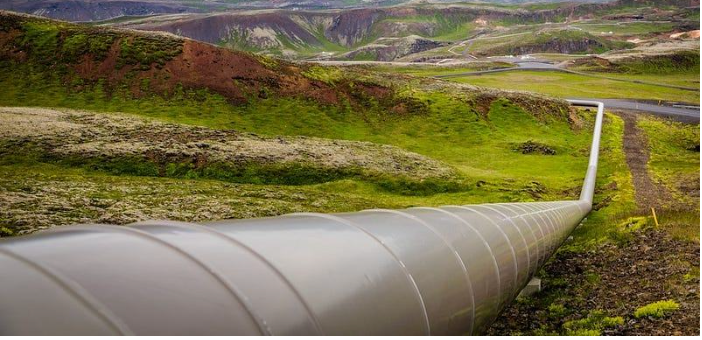

```
pipeline(NLP/머신러닝모델명) 함수
```
> * 다양한 NLP / 머신러닝 모델을 불러와 바로 활용할 수 있게 해주는 고수준(High-level) 인터페이스
> * 함수 호출만으로 미리 학습된(pretrained) 모델을 불러와 여러 작업(태스크)을 수행 가능

In [ ]:
pipeline?

In [ ]:
from transformers import pipeline

classifier = pipeline(task="sentiment-analysis")  # 모델을 지정하지 않으면, 기본 모델로 /distilbert/distilbert-base-uncased-finetuned-sst-2-english 을 사용

# 여러개의 문장 각각에 대해서도 인식 가능
classifier(
    ["I love using Hugging Face Transformers!",
     "I hate this so much!"]
)

In [ ]:
# 여러개의 문장 각각에 대해서도 인식 가능
classifier(
    ["I love using Hugging Face Transformers!",
     "I hate this so much!",
     "I've been waiting for a HuggingFace course my whole life."
    ]
)

In [ ]:
results = classifier(
           ["I love using Hugging Face Transformers!",
            "I hate this so much!",
            "I've been waiting for a HuggingFace course my whole life."
           ]
           )

In [ ]:
results

In [ ]:
# 문제 : 아래와 같이 출력되도록

# 1번 문장은 "긍정"
# 2번 문장은 "부정"
# 3번 문장은 "긍정"




In [ ]:
# 참고
# 고수준 구현 (내부 과정이 pipeline으로 추상화)

from transformers import pipeline

classifier = pipeline(task="sentiment-analysis")
# 한국어 감정분석 모델 로드
#classifier = pipeline(task="sentiment-analysis", model="snunlp/KR-ELECTRA-discriminator")

classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!",
     "I love using Hugging Face Transformers!"]
)

In [ ]:
# 저수준 구현 (토큰화, 모델 적용 과정이 명시적)
# 혹은 파인튜닝 할 때...

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'POSITIVE'

## Zero-shot-classification(제로샷 분류)

**`Zero-shot Classification`** : 사전 학습된 모델이 학습하지 않은 레이블(클래스)에 대해서도 분류할 수 있는 기능

* [facebook/bart-large-mnli · Hugging Face](https://huggingface.co/facebook/bart-large-mnli)

In [ ]:
# 모델 불러오기
from transformers import pipeline

classifier = pipeline(task="zero-shot-classification", model='facebook/bart-large-mnli')

Device set to use cpu


In [ ]:
classifier(
    sequences = "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445994257926941, 0.11197380721569061, 0.04342673346400261]}

In [ ]:
classifier(
    sequences = "Son Heung-min had one goal and two assists in the game",
    candidate_labels=["education", "politics", "business"]  # "sports", "football"
)

In [ ]:
result = classifier(
        sequences ="Son Heung-min had one goal and two assists in the game",
        candidate_labels=["education", "politics", "business", "sports", "football"],
        )

Device set to use cpu


In [ ]:
# 문제 : 가장 확률 높은 카테고리를 출력

result

{'sequence': 'Son Heung-min had one goal and two assists in the game',
 'labels': ['sports', 'football', 'business', 'education', 'politics'],
 'scores': [0.7624748349189758,
  0.10719013959169388,
  0.07416648417711258,
  0.03556269407272339,
  0.02060587890446186]}

In [ ]:
# multi-label
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing', 'exploration']

classifier(sequence_to_classify, candidate_labels, multi_label=True)

## Text-generation

* [gpt2 · Hugging Face](https://huggingface.co/gpt2)

In [ ]:
# 모델 불러오기
from transformers import pipeline

generator = pipeline(task="text-generation", model="openai-community/gpt2")

In [ ]:
generator("In this course, we will teach you how to")

In [ ]:
generator("My name is")

In [ ]:
#set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

* [skt/kogpt2-base-v2 · Hugging Face](https://huggingface.co/skt/kogpt2-base-v2)

In [ ]:
# 한글 모델 불러오기
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='skt/kogpt2-base-v2')

In [ ]:
#set_seed(42)
generator("안녕 너는,", max_length=30, num_return_sequences=3)

In [ ]:
generator("나는 지난 주에 시험을 봤는데 너무 어려워서, ", max_length=30, num_return_sequences=3)

In [ ]:
generator("나는 지난 주에 시험을 봤는데 너무 어려워서, ", max_length=50, num_return_sequences=3, temperature=0.8, top_p=0.9)

## Fill-mask

In [ ]:
# 모델 불러오기
from transformers import pipeline

unmasker = pipeline(task="fill-mask", model="distilbert/distilroberta-base")

In [ ]:
unmasker("This course will teach you all about <mask> models.", top_k=5)

* [klue/bert-base · Hugging Face](https://huggingface.co/klue/bert-base)

In [ ]:
# 한글 모델 불러오기
unmasker_klue = pipeline(task="fill-mask", model="klue/bert-base")

In [ ]:
unmasker_klue("내가 좋아하는 스포츠는 [MASK]입니다.", top_k=5)

## NER(Named Entity Recognition) :

객체명 인식(NER(Named Entity Recognition)) : 텍스트에서 특정 유형의 단어 또는 구(phrase)를 식별하고 분류하는 자연어 처리(NLP) 작업

* [dbmdz/bert-large-cased-finetuned-conll03-english · Hugging Face](https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)

In [ ]:
# 모델 불러오기

from transformers import pipeline

ner = pipeline(task="ner", grouped_entities=True)

In [ ]:
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

In [ ]:
ner("I'm a student of Chungnam Science High School")

In [ ]:
# 한글 모델 불러오기
ner = pipeline(task="ner", model='euneun9/kogpt2-base-v2-finetuned-klue-ner', grouped_entities=True)

In [ ]:
ner("안녕!, 나는 충남과학고등학교 학생이야.")

## Question-answering

In [ ]:
# 영어 모델 불러오기
from transformers import pipeline

question_answerer = pipeline(task="question-answering", model='distilbert/distilbert-base-cased-distilled-squad')

In [ ]:
question_answerer(
    question="Where do I live?",
    context="My name is John and I live in gongju",
)

In [ ]:
# 한글 모델 불러오기
from transformers import pipeline

question_answerer = pipeline(task="question-answering", model="monologg/koelectra-base-v3-finetuned-korquad")

In [ ]:
question_answerer(
    question="존은 살까",
    context="존은 미국에 살고, 철수는 한국에 살아",
)

## Summarization
* [sshleifer/distilbart-cnn-12-6 · Hugging Face](https://huggingface.co/sshleifer/distilbart-cnn-12-6)

In [ ]:
from transformers import pipeline

summarizer = pipeline(task="summarization", model="sshleifer/distilbart-cnn-12-6")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

* [gogamza/kobart-summarization · Hugging Face](https://huggingface.co/gogamza/kobart-summarization)

In [ ]:
ko_summarizer = pipeline(task="summarization", model="gogamza/kobart-summarization")


text = "토트넘 홋스퍼의 사령탑 안지 포스테코글루 감독이 양민혁의 합류를 반겼다. 포스테코글루 감독은 아직 선수 등록 기간이 아니기 때문에 양민혁이 토트넘 선수들과 함께 훈련하지 못하고 있지만 양민혁과 대화를 나누면서 긍정적인 기류를 느꼈다고 밝혔다. 양민혁은 지난 16일(이하 한국시간) 인천국제공항을 통해 영국 런던으로 출국했다. 2024시즌 강원FC에서 프로에 데뷔한 뒤 온전히 한 시즌을 소화하며 강원의 역대 최고 성적에 해당되는 준우승에 기여한 양민혁은 당초 휴식을 취하고 내년 1월 토트넘에 합류할 것으로 예상됐으나, 토트넘 측의 조기 요청으로 인해 예상보다 빨리 런던으로 향하게 됐다. 양민혁은 올 시즌 K리그1에 혜성처럼 등장한 한국의 초특급 유망주다. 2006년생으로 강릉제일고등학교에 재학 중인 고등학생이지만 강원이 시즌 전 튀르키예로 전지훈련을 떠났을 때 강원 1군 선수들과 동행해 전지훈련에서 윤정환 감독의 눈에 들었고, 선배들 사이에서 당당하게 실력을 인정받아 프로에 데뷔할 수 있었다."

ko_summarizer(text,
    # max_length=128,    # 요약문 최대 토큰 길이
    # min_length=30,     # 요약문 최소 토큰 길이
    # do_sample=False,   # 결과의 일관성 확보를 위해 Sampling 비활성화
    # truncation=True
)

## Translation

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

In [ ]:
ko_translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")
ko_translator("안녕하세요.")

## Translation 2

In [ ]:
# 번역 모델 불러오기
from transformers import pipeline

# 번역 파이프라인
translator = pipeline("translation", model="facebook/m2m100_418M", tokenizer="facebook/m2m100_418M")

Device set to use cpu


In [ ]:
text = "안녕하세요"
translated = translator(text, src_lang="ko", tgt_lang="en")
translated

[{'translation_text': 'Hello'}]

In [ ]:
text = "Hello"
translated = translator(text, src_lang="en", tgt_lang="ko")
translated

[{'translation_text': '안녕하세요'}]

In [ ]:
# 문제 : 함수 정의하기
# trans_lang("en", "hello") --> "안녕하세요" 리턴
# trans_lang("ko", "안녕하세요") --> "Hello" 리턴

from transformers import pipeline

# 번역 파이프라인
translator = pipeline("translation", model="facebook/m2m100_418M", tokenizer="facebook/m2m100_418M")

def trans_lang(src_lang, src_text) :
    ???

    return ?????


lang = "ko"
text = "안녕하세요"
translated = trans_lang(lang, text)
translated

### 언어감지 모델

In [ ]:
!pip install fasttext

In [ ]:
import fasttext
from huggingface_hub import hf_hub_download

model_lang_cls = fasttext.load_model(hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin"))

model_lang_cls.predict("안녕")

# Computer Vision(컴퓨터 비전)

## Visual Question Answering (VQA)(이미지 인식 및 질문 답변)

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# 모델 불러 들이기
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

In [ ]:
# 이미지를 URL로 다운받기
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# 질문
text = "How many cats are there?"
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

In [ ]:
# 이미지를 URL로 다운받기
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# 질문
text = "What is the color of the cat?"
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

## OCR

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoTokenizer
import requests
import unicodedata
from io import BytesIO
from PIL import Image

processor = TrOCRProcessor.from_pretrained("ddobokki/ko-trocr")
model = VisionEncoderDecoderModel.from_pretrained("ddobokki/ko-trocr")
tokenizer = AutoTokenizer.from_pretrained("ddobokki/ko-trocr")

url = "https://raw.githubusercontent.com/ddobokki/ocr_img_example/master/g.jpg"
#url = "https://d2v80xjmx68n4w.cloudfront.net/gigs/0Z3iS1611511972.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

pixel_values = processor(img, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values, max_length=64)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text = unicodedata.normalize("NFC", generated_text)
print(generated_text)

## Image Captioning(이미지 캡셔닝)

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# 이미지 캡션 모델 로드
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

In [7]:
# 이미지 URL
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"

image = Image.open(requests.get(image_url, stream=True).raw)

captions = captioner(image)

In [ ]:
captions

In [ ]:
# 이미지 URL
image_url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyNDExMjZfMTUy%2FMDAxNzMyNTg0NDU3NjEz.LcBIorOLSD5vm6AwJCRmXw9aI2H_xs-t1OLSe1jSNiAg.FY7pc3NSoFeEPf0UdAYxO_7Z1n7EF1qdga54iEmlqssg.PNG%2F%25B0%25AD%25BE%25C6%25C1%25F6%25B5%25A7%25C5%25BB%25B2%25AD17.png&type=a340"

image = Image.open(requests.get(image_url, stream=True).raw)

captions = captioner(image)
captions

## Depth Estimation(깊이 추정)

In [ ]:
from transformers import GLPNImageProcessor, GLPNForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#url = "https://www.thevaluenews.co.kr/data/cheditor4/2406/3312b02611cc77fc4478a4112d44be371ed7e82c.jpg"
#url = "https://img.khan.co.kr/news/2024/10/16/l_2024101601000455800042931.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = GLPNImageProcessor.from_pretrained("vinvino02/glpn-nyu")
model = GLPNForDepthEstimation.from_pretrained("vinvino02/glpn-nyu")

# prepare image for the model
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth

### 어두운 곳이 검게, 먼 곳이 발게 보임...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# PIL Image를 numpy 배열로 변환
depth_array = np.array(depth)

# 가장 어두운 픽셀(가장 가까운 있는 지점, 0~255 중 작은 값이 검은색) 찾기
y, x = np.unravel_index(np.argmin(depth_array), depth_array.shape)

# 결과 시각화
plt.figure(figsize=(15, 5))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.plot(x, y, 'rx', markersize=10, label='Farthest Point')
plt.title('Original Image')
plt.legend()

# 깊이 맵
plt.subplot(1, 2, 2)
plt.imshow(depth)
plt.plot(x, y, 'rx', markersize=10, label='Farthest Point')
plt.title('Depth Map')
plt.legend()

print(f"가장 먼 지점의 좌표: (x={x}, y={y})")
print(f"해당 지점의 깊이 값: {depth_array[y, x]}")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# PIL Image를 numpy 배열로 변환
depth_array = np.array(depth)

# 가장 밝은 픽셀(가장 먼 지점, 0~255 중 작은 값이 검은색) 찾기
y, x = np.unravel_index(np.argmax(depth_array), depth_array.shape)

# 결과 시각화
plt.figure(figsize=(15, 5))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.plot(x, y, 'rx', markersize=10, label='Nearest Point')
plt.title('Original Image')
plt.legend()

# 깊이 맵
plt.subplot(1, 2, 2)
plt.imshow(depth)
plt.plot(x, y, 'rx', markersize=10, label='Nearest Point')
plt.title('Depth Map')
plt.legend()

print(f"가장 가까운 지점의 좌표: (x={x}, y={y})")
print(f"해당 지점의 깊이 값: {depth_array[y, x]}")

plt.show()

## 이미지 생성형 AI

In [ ]:
!pip install -U diffusers

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipeline(prompt).images[0]
image.save("generated_image.png")

https://huggingface.co/black-forest-labs/FLUX.1-dev

In [ ]:
# GPU 자원이 충분하다면, 이것으로 실행
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe = pipe.to("cuda")  # 모델을 GPU로 이동

prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512
).images[0]
image.save("flux-dev.png")

## Object Detection(객체 탐지)

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# 객체 탐지 모델 로드
detector = pipeline("object-detection", model="facebook/detr-resnet-50")

# 이미지 로드
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# 객체 탐지 수행
results = detector(image)

In [ ]:
results

In [ ]:
# 1번째 물체 이름(label) 추출


In [ ]:
# 1번째 물체 탐지명에 대한 신뢰도(score) 추출


In [ ]:
# 1번째 물체의 좌표(xmin, ymin, xmax, ymax) 추출


In [ ]:
# 반복문으로 모든 물체


In [ ]:
from transformers import pipeline
from PIL import Image, ImageDraw, ImageFont
import requests

# 이미지 로드
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

draw = ImageDraw.Draw(image)

draw.text((250, 250), "CungnamScienceHighSchool", fill="yellow")
draw.rectangle([(5, 5), (100, 100)], outline="red", width=3)

# 결과 이미지 저장
image.save("detected_objects.png")
image.show()

In [ ]:
# 문제 : 탐지된 모든 객체에 박스 그리고, 객체명 쓰기...

from transformers import pipeline
from PIL import Image
import requests

# 객체 탐지 모델 로드
detector = pipeline("object-detection", model="facebook/detr-resnet-50")

# 이미지 로드
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# 객체 탐지 수행
results = detector(image)

for result in results :
    print(result)



# GPT 챗봇

In [ ]:
import openai

my_chat = openai.OpenAI(api_key = "sk-proj-NKWZaW9En3I14PwuC0Wb4pyc6EQ9TcB5oJmfEI_SZ4APn9BBoX_0iAG1cdVXWe_khVGxWE5IRwT3BlbkFJj7v24JDF6XexxuU9VJ7tl_REjAjg4tAF8MLYDKc1XCfVxeTsAD7EwW4jQq29hxcu6WK9FXMn0?")

response = my_chat.chat.completions.create(
  model="gpt-4",
  messages=[{"role": "user", "content": "올해 크리스마스 영화 추천해 줘."}],
  max_tokens=100
)

response

ChatCompletion(id='chatcmpl-Ag6WDPTo8Jm5tivUiOcWNvtjanvth', choices=[Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content='본인의 취향에 따라 많은 영화가 있지만 이번 크리스마스 시즌에 추천해드릴 만한 영화들은 다음과 같습니다:\n\n1. "러브 액츄얼리" (Love Actually) - 크리스마스를 배경으로 한 여러 사랑 이야기를 담아', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1734598197, model='gpt-4-0613', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=100, prompt_tokens=27, total_tokens=127, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

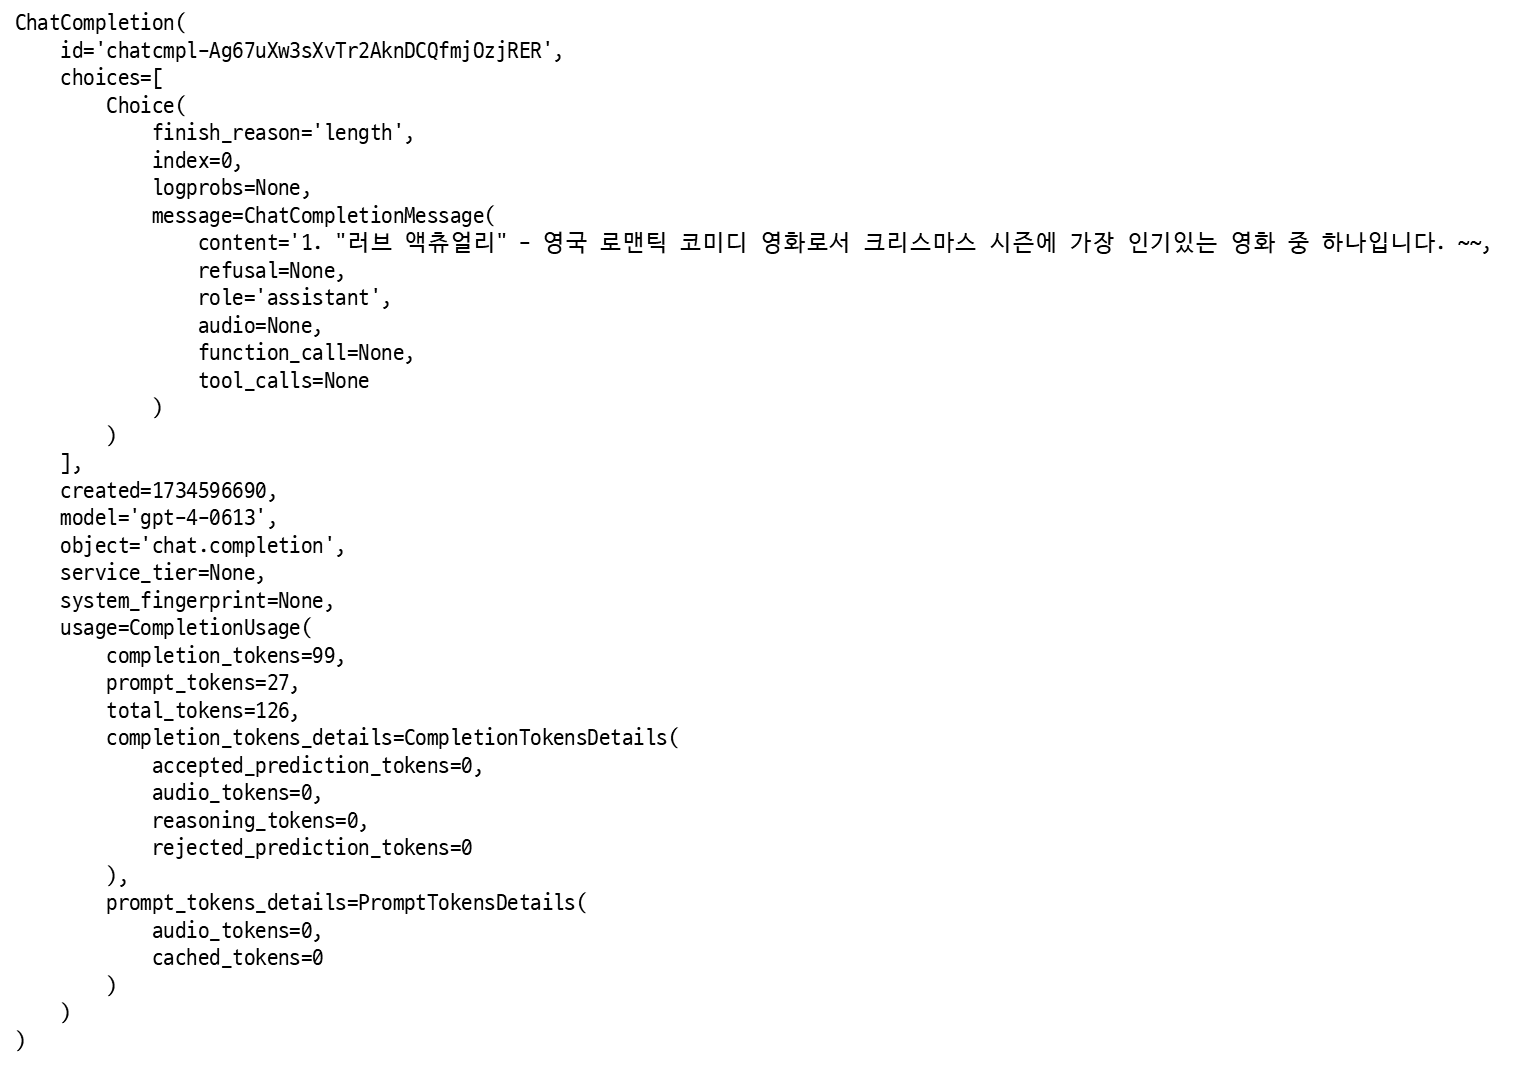

In [ ]:
response = my_chat.chat.completions.create(
  model="gpt-4",
  messages=[{"role": "user", "content": "올해 크리스마스 영화 추천해 줘."}],
  max_tokens=1000
)

print(response.choices[0].message.content)

1. "러브 액츄얼리" - 여러 사람들의 사랑 이야기를 담고 있는 이 영화는 크리스마스 때 마다 사랑받는 클래식 영화입니다.
2. "홈 얼론" - 크리스마스에 가족과 함께 보기 좋은 최고의 가족 영화로 꼽힙니다. 
3. "극장판 요괴워치: 포에버 프렌즈" - 크리스마스 시즌을 맞이해 아이들과 함께 보기 좋은 애니메이션 영화입니다.
4. "폴라 익스프레스" - 잊어버린 크리스마스의 의미를 찾게 해주는 심리적인 이야기를 담고 있습니다.
5. "엘프" - 크리스마스 영화 중 가장 재미있는 작품으로 평가받고 있는 영화입니다.
6. "크리스마스에 기적을 만난 가족" - 평범한 가존데 일어난 기적을 그린 영화로 가족 모두가 함께 봐도 좋습니다.
7. "노엘" - 산타클로스의 딸이 주인공인 판타지 영화로, 크리스마스 분위기를 느끼기에 충분한 영화입니다.


#### 1단계 : 실행 중 질문을 입력하고, 응답받기

In [ ]:
request = input("나의 말 : ")

response = my_chat.chat.completions.create(
    model="gpt-4",
    messages=[
              {"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."},
              {"role": "user", "content": request}
    ]
)

print("GPT의 말 : ", response.choices[0].message.content)

나의 말 : 안녕!!!
GPT의 말 :  안녕하세요! 어떤 것을 도와드릴까요?


#### 2단계 : 대화(질문/답변) 계속 반복하기

In [ ]:
while True :
    request = input("나의 말 : ")

    response = my_chat.chat.completions.create(
    model="gpt-4",
        messages=[
                 {"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."},
                 {"role": "user", "content": request}
        ]
    )

    print("GPT의 말 : ", response.choices[0].message.content)

나의 말 : 안녕
GPT의 말 :  안녕하세요! 무엇을 도와드릴까요?
나의 말 : 나는 홍길동이야
GPT의 말 :  안녕하세요, 홍길동님! 어떤 도움이 필요하신가요?
나의 말 : 내 이름이 뭐라고?
GPT의 말 :  죄송합니다. 사용자님의 이름을 알 수 없습니다.


KeyboardInterrupt: Interrupted by user

#### 3단계 : 주고 받은 대화 목록을 계속 저장하기

In [ ]:
message_box = [{"role": "system", "content": "묻는 말에 100글자 이내로 대답해 줘."}]

while True :
    request = input("나의 말 : ")

    message_box.append({"role": "user", "content": request}) # 내 말을 담기

    response = my_chat.chat.completions.create(
    model="gpt-4",
      messages=message_box
    )


    answer = response.choices[0].message.content

    message_box.append({"role": "assistant", "content": answer}) # GPT 말을 담기

    print("GPT의 말 : ", answer)

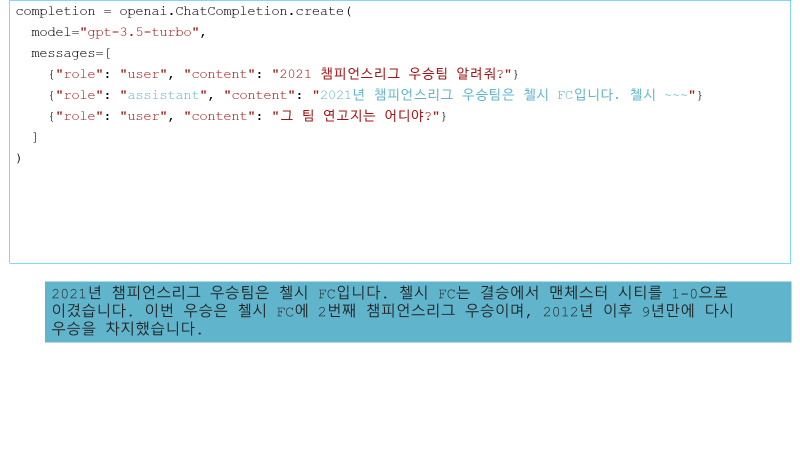

#### 4단계 : (대화 종료를 의미하는 말을 했을 때) 끝낼 수 있도록...

In [ ]:
message_box = [{"role": "system", "content": """
                묻는 말에 100글자 이내로 대답해 줘.
                사람이 "끝"이나 "종료"를 나타내는 말을 하면,
                너는 반드시 'END'라고만 출력 해야해...
              """}]

while True :
    request = input("나의 말 : ")

    message_box.append({"role": "user", "content": request}) # 내 말을 담기

    response = my_chat.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=message_box
    )


    answer = response.choices[0].message.content

    message_box.append({"role": "assistant", "content": answer}) # GPT 말을 담기

    print("GPT의 말 : ", answer)

위 코드 실행 예시
> >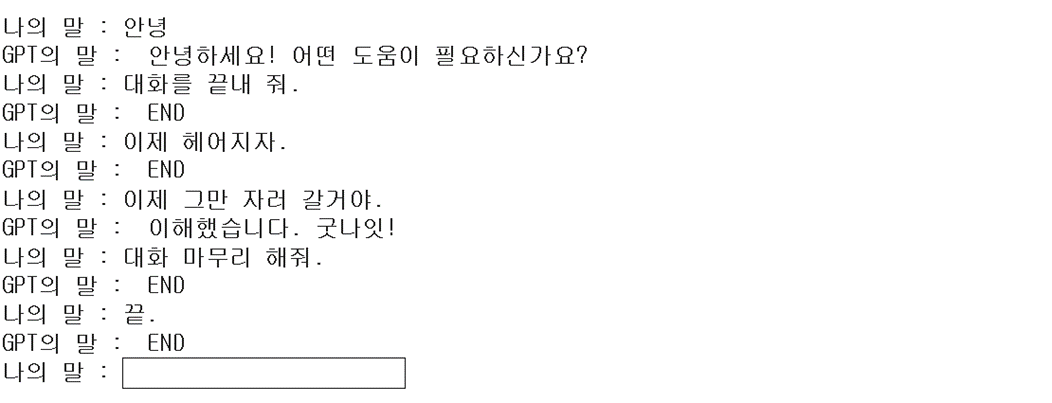